# Aula 13 - NLP: Bag Of Words e TF-IDF

Na aula de hoje iniciaremos as nossas conversas sobre o processamento de linguagem natural (NLP), em que abordaremos um tipo bem específico e importante de dado não estruturado, os textos:

### - Primeira parte

- Testes com o projeto

### - Segunda parte

- Introdução e contextualização

### - Terceira parte

- A abordagem simples e poderosa: Bag Of Words  

### - Quarta parte

- Exemplos de Bag Of Words

### - Quinta parte

- Aumentando um pouco a complexidade: TF-IDF

### - Sexta parte

- Exemplos TF-IDF

# Introdução e contextualização

## Dados não estruturados: textos

Na aula passada falamos sobre diversos tipos de dados não estruturados: imagens, textos, vídeos, páginas da internet, etc. Ficou claro a estratégia básica que rege a modelagem desse tipo de dado: a criação de features ou, mais formalmente, a definição de um espaço de representação para o problema. Não é diferente com textos: estudaremos alguns métodos bastante úteis para representar textos como vetores e, então, usar os nossos modelos tradicionais para realizar tarefas inerentes do processamento de linguagem natural: **análise de sentimento (classificar um texto)**, **tradução automática**, **geração automática de texto**, entre outras.  

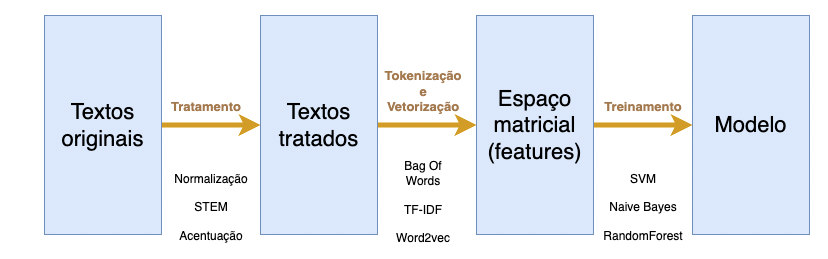


### - Tratamento

Existem infinitas possibilidades de tratamento do texto. Cada problema exigirá uma abordagem diferentes, mas algumas técnicas mais frequentes são:

- **Normalização**: deixar todo o texto em letras maiúsculas ou minúsculas;
- **STEM**: padronizar palavras com mesmo significado. Exemplo: _bonito_ e _bonita_ viram _bonit_;
- **Acentuação**: remoção de acentos das letras;
- **Stop Words**: remoção de palavras que agregam pouco significado. Exemplo: _de_, _que_, _como_.
    
    
### - Tokenização e Vetorização

A tokenização e vetorização são processos que ocorrem de maneira conjunta e sequencial. O processo de tokenização consiste em transformar uma string em uma sequência de tokens, como no seguinte exemplo:

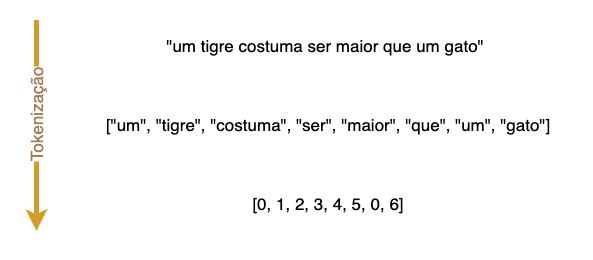
    
Perceba que, para que esse processo seja executado, precisamos criar uma tabela que associa cada palavra a um id único, da seguinte maneira:

|palavra|id|
|-|-|
|um|0|
|tigre|1|
|costuma|2|
|ser|3|
|maior|4|
|que|5|
|gato|6|

Chamamos essa tabela de **vocabulário**.

A partir do texto tokenizado, podemos aplicar as técnicas de vetorização, que buscam criar a representação colunar dos nosso dados para que possamos utilizar os modelos. Estudaremos duas técnicas hoje: **Bag Of Words** e **TF-IDF**. Na próxima aula, veremos a técnica **Word2vec**.

## Bag Of Words

O Bag Of Words, muitas vezes referenciado como BoW, é a técnica mais simples e também a mais popular de se criar uma vetorização de um texto tokenizado. A técnica consiste em representar cada texto com a contagem de cada palavra do vocabulário. Vejamos a representação do Bow para o nosso exemplo:

|gato|que|maior|costuma|um|tigre|ser|
|-|-|-|-|-|-|-|
|1|1|1|1|2|1|1|

Vamos supor que queiramos, então, obter a representação BoW para a seguinte frase "um gato não é um tigre". Com o nosso vocabulário, obtemos a seguinte representação:

|gato|que|maior|costuma|um|tigre|ser|
|-|-|-|-|-|-|-|
|1|0|0|0|2|1|0|

Perceba que a palavra "não", por não fazer parte do vocabulário, não altera a sua representação, fazendo com que a frase "um gato é um tigre" tenha a mesma forma. Para evitar esse tipo de problema, é comum que os vocabulários possuam um par palavra-id para palavras que não são conhecidas, ou seja, que não estavam presentes no momento de criação do vocabulário. Nesse caso, teríamos a seguinte representação:

|gato|que|maior|costuma|um|tigre|ser|\<desconhecido\>
|-|-|-|-|-|-|-|-|
|1|0|0|0|2|1|0|2|


Uma sequência de textos pode, então, ser mapeada numa matriz que, por sua vez, pode alimentar um modelo de Machine Learning convencional, como vimos na primeira parte do módulo!

Baseado no nosso vocabulário, podemos ter a seguinte representação:

### <center>Vocabulário</center>

|palavra|id|
|-|-|
|um|0|
|tigre|1|
|costuma|2|
|ser|3|
|maior|4|
|que|5|
|gato|6|
|\<desconhecido\>|-1|

### <center>Texto original</center>

|texto|
|-|
|"um gato costuma ser maior que um tigre"|
|"um gato não é um tigre"|
|"um gato é um tigre"|

### <center>Texto tokenizado</center>

|texto|
|-|
|[0, 1, 2, 3, 4, 5, 0, 6]|
|[0, 6, -1, -1, 0, 1]|
|[0, 6, -1, 0, 1]|

### <center>BoW</center>

|gato|que|maior|costuma|um|tigre|ser|\<desconhecido\>
|-|-|-|-|-|-|-|-|
|1|1|1|1|2|1|1|0|
|1|0|0|0|2|1|0|2|
|1|0|0|0|2|1|0|1|

# Exemplo Bag Of Words

In [2]:
import numpy as np
import pandas as pd

#### Carregando nosso dataset

In [3]:
from sklearn.model_selection import train_test_split

# Carregando o dataset

df_imdb = pd.read_csv('IMDB Dataset.csv')

df_imdb = df_imdb[df_imdb['sentiment'].isin(['positive', 'negative'])]

df_imdb.loc[df_imdb['sentiment'] == 'positive', 'sentiment'] = 1
df_imdb.loc[df_imdb['sentiment'] == 'negative', 'sentiment'] = 0

df_imdb['sentiment'] = df_imdb['sentiment'].astype(int)

print(df_imdb.shape)

df_imdb.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


#### Análise exploratória

In [4]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(texts):
    plt.figure(figsize=(10, 10))
    text = ' '.join(texts.tolist())
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
    words = WC.generate(text)
    plt.imshow(words, interpolation='bilinear')
    plt.show()

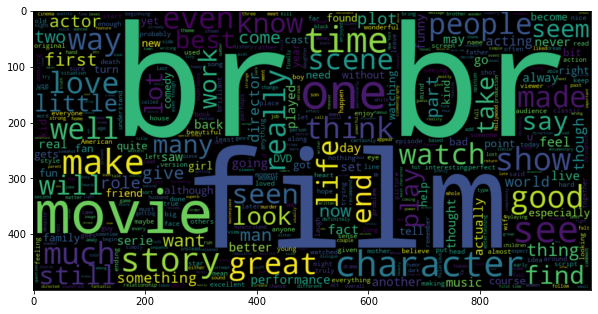

In [5]:
plot_wordcloud(df_imdb.loc[df_imdb['sentiment'] == 1, 'review'])

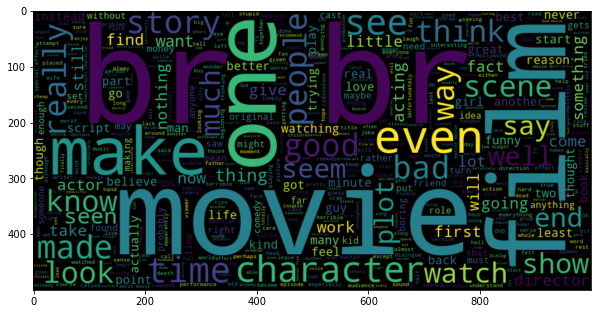

In [6]:
plot_wordcloud(df_imdb.loc[df_imdb['sentiment'] == 0, 'review'])

Vemos tags HTML aparecendo no wordcloud, o que indica a necessidade de uma limpeza extra

In [7]:
from bs4 import BeautifulSoup

def clean_html(text):
    clean_text = BeautifulSoup(text, 'lxml').text
    
    return clean_text


In [8]:
df_imdb['review'] = df_imdb['review'].apply(clean_html)

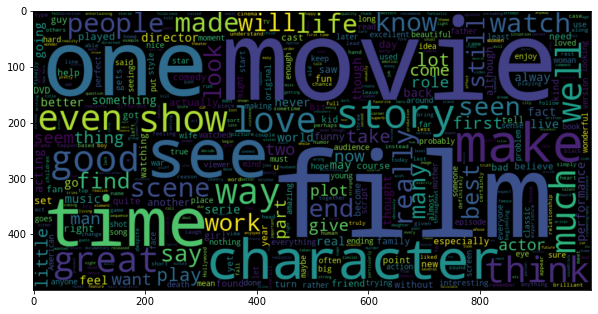

In [9]:
plot_wordcloud(df_imdb.loc[df_imdb['sentiment'] == 1, 'review'])

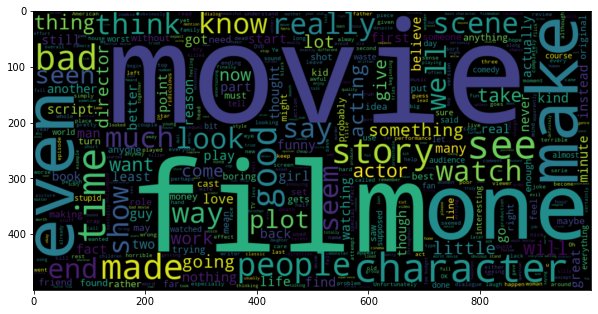

In [10]:
plot_wordcloud(df_imdb.loc[df_imdb['sentiment'] == 0, 'review'])

In [11]:
df_train, df_valid = train_test_split(df_imdb, test_size=.2)

x_train, y_train = df_train['review'], df_train['sentiment']
x_valid, y_valid = df_valid['review'], df_valid['sentiment']

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(40000,) (40000,)
(10000,) (10000,)


#### Pré-processamento

In [56]:
# Aplicando o BagOfWords

from sklearn.feature_extraction.text import CountVectorizer

# Nota do professor Helder: usamos, em geral, entre 10000 e 30000 como tamanho do vocabulário
vectorizer = CountVectorizer(max_features=10000, stop_words='english')

vectorizer.fit(x_train)

CountVectorizer(max_features=10000, stop_words='english')

In [57]:
x_train_transformed = vectorizer.transform(x_train).toarray()

print(x_train_transformed.shape)

x_valid_transformed = vectorizer.transform(x_valid).toarray()

print(x_valid_transformed.shape)

(40000, 10000)
(10000, 10000)


#### Selecionando o modelo

In [59]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB

In [60]:
# modelo = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=12)
modelo = MultinomialNB()

modelo

MultinomialNB()

#### Treino do modelo



In [61]:
# Treino do modelo

modelo.fit(x_train_transformed, y_train)

MultinomialNB()

#### Resultados



In [62]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(40000,) (10000,)


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.86, Precision: 0.87, Recall: 0.85
Validação:
Acc: 0.85, Precision: 0.86, Recall: 0.83


# TF-IDF

Uma abordagem ainda simples, mas que insere um pouco mais de informação sobre o texto na representação é o TF-IDF. Nessa técnicas, em vez de apenas contarmos a frequência das palavras no texto (TF, term frequency), ponderamos a representação por um termo inversamente proporcional à frequência do termo em todo o dataset (IDF, inverse document frequency).      

<br>

### <center>IDF</center>

$$ IDF_{t} = log(|C|/N_{t}) $$

<center>Onde $ N_{t} $ é o número de textos que a palavra aparece no dataset, e $ |C| $ é o tamanho do dataset.</center>  

O IDF é uma propriedade conjunta das palavras e do dataset, ou seja, ela não precisa ser calculada para cada novo texto. Dado um dataset, assim como um vocabulário, o cálculo dos termos IDF são feitos a priori. Vejamos nosso exemplo:

### <center>Vocabulário</center>

|palavra|id|
|-|-|
|um|0|
|tigre|1|
|costuma|2|
|ser|3|
|maior|4|
|que|5|
|gato|6|
|\<desconhecido\>|-1|

### <center>Texto original</center>

|texto|
|-|
|"um gato costuma ser maior que um tigre"|
|"um gato não é um tigre"|
|"um gato é um tigre"|

### <center>IDF</center>

|palavra|IDF|
|-|-|
|um|0|
|tigre|0|
|costuma|1.1|
|ser|1.1|
|maior|1.1|
|que|1.1|
|gato|0|
|\<desconhecido\>|0.4|

### <center>TF-IDF</center>

|gato|que|maior|costuma|um|tigre|ser|\<desconhecido\>
|-|-|-|-|-|-|-|-|
|1\*0|1\*1.1|1\*1.1|1\*1.1|2\*0|1\*0|1\*1.1|0\*0.4|
|1\*0|0\*1.1|0\*1.1|0\*1.1|2\*0|1\*0|0\*1.1|2\*0.4|
|1\*0|0\*1.1|0\*1.1|0\*1.1|2\*0|1\*0|0\*1.1|1\*0.4|

<center>\/</center>
<center>\/</center>
<center>\/</center>

|gato|que|maior|costuma|um|tigre|ser|\<desconhecido\>
|-|-|-|-|-|-|-|-|
|0|1.1|1.1|1.1|0|0|1.1|0  |
|0|0  |0  |0  |0|0|0  |0.8|
|0|0  |0  |0  |0|0|0  |0.4|

# Exemplo TF-IDF

#### Pré-processamento

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)

vectorizer.fit(x_train)

TfidfVectorizer(max_features=10000)

In [65]:
x_train_transformed = vectorizer.transform(x_train).toarray()

print(x_train_transformed.shape)

x_valid_transformed = vectorizer.transform(x_valid).toarray()

print(x_valid_transformed.shape)

(40000, 10000)
(10000, 10000)


In [66]:
# Para limpar a memória não utilizada
# import gc

# gc.collect()

#### Selecionando o modelo

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
# modelo = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=12)

modelo = MultinomialNB()

modelo

MultinomialNB()

#### Treino do modelo



In [69]:
# Treino do modelo

modelo.fit(x_train_transformed, y_train)

MultinomialNB()

#### Resultados



In [70]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(40000,) (10000,)


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.87, Precision: 0.88, Recall: 0.87
Validação:
Acc: 0.86, Precision: 0.86, Recall: 0.85


----------

# Pra anotar

- Tanto o BoW, quanto o TF-IDF não levam em consideração a ordem das palavras para criar a sua representação;

- Essas técnicas se baseiam completamente no léxico das palavras. Sinônimos não são levados em consideração;

- Apesar da abordagem simples, levou muito tempo para que surgissem técnicas com performance superior. Até hoje, em aplicações simples, podemos utilizar o BoW e o TF-IDF.